In [1]:
import pandas as pd
import torch
import sys
sys.path.append('/home/share/huadjyin/home/s_qiuping1/hanyuxuan')
from biollm.evaluate.drug_plot import *

In [5]:
device = torch.device("cuda:1" if torch.cuda.is_available() else 'cpu')
# data saved, same to 
save_path = '/home/share/huadjyin/home/s_qiuping1/hanyuxuan/save'
plot_path = '/home/share/huadjyin/home/s_qiuping1/hanyuxuan/evaluatePlot'  # path to save figs
plot_type = 'pdf'

Fig 1: Bar Plot

/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/biollm/evaluate/drug_plot.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, horizontalalignment='right')


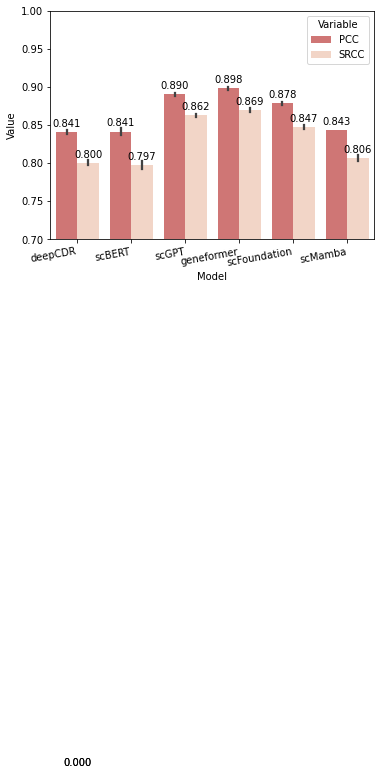

In [7]:
result_paths = {
    'deepcdr': f'{save_path}/data/random_test/no_random_test.csv',
    'scbert': f'{save_path}/data/random_test/scbert_random_test.csv',
    'scgpt': f'{save_path}/data/random_test/scgpt_random_test.csv',
    'geneformer': f'{save_path}/data/random_test/geneformer_random_test.csv',
    'scfoundation': f'{save_path}/data/random_test/scfoundation_random_test.csv',
    'scmamba': f'{save_path}/data/random_test/scmamba_random_test.csv'
}
results = {name: pd.read_csv(path) for name, path in result_paths.items()}

bar_all_plot(results, plot_path, plot_type)

Fig 2: Scatter Plot

In [9]:
model_paths = {
    'deepcdr': f'{save_path}/modelSave/no/best_no_model.pt',
    'scbert': f'{save_path}/modelSave/scbert/best_scbert_model.pt',
    'scgpt': f'{save_path}/modelSave/scgpt/best_scgpt_model.pt',
    'geneformer': f'{save_path}/modelSave/geneformer/best_geneformer_model.pt',
    'scfoundation': f'{save_path}/modelSave/scfoundation/best_scfoundation_model.pt',
    'scmamba': f'{save_path}/modelSave/scmamba/best_scmamba_model.pt'
}

test_data_paths = {
    'deepcdr': f'{save_path}/data/test_data/no_test_data.pth',
    'scbert': f'{save_path}/data/test_data/scbert_test_data.pth',
    'scgpt': f'{save_path}/data/test_data/scgpt_test_data.pth',
    'geneformer': f'{save_path}/data/test_data/geneformer_test_data.pth',
    'scfoundation': f'{save_path}/data/test_data/scfoundation_test_data.pth',
    'scmamba': f'{save_path}/data/test_data/scmamba_test_data.pth'
}

mut_feat, drug_feat, gexpr_feat, methy_feat, all_data_idx = torch.load(f'{save_path}/data/meta.pth')
all_drug_ids = list(set(drug_feat.keys()))
all_cancer_types = ["ALL", "BLCA", "BRCA", "DLBC", "LIHC", "LUAD",
                    "ESCA", "GBM", "HNSC", "KIRC", "LAML", "LCML", "LGG",
                    "LUSC", "MESO", "MM", "NB", "OV", "PAAD", "SCLC", "SKCM",
                    "STAD", "THCA", 'COAD/READ']

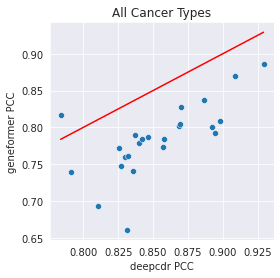

In [10]:
# deepcdr / scgpt / scbert / geneformer / scfoundation / scmamba
model_name_1, model_name_2 = 'deepcdr', 'geneformer'
drug_or_cancer = 'cancer'  # drug / cancer(meaning cancer type)
model_1, model_2 = load_model(model_paths, device, model_name_1, model_name_2)
mod1_pcc, mod2_pcc = predict_pcc(test_data_paths, all_drug_ids, all_cancer_types, device,
                                 drug_or_cancer, model_1, model_2, model_name_1, model_name_2)
scatter_plot(mod1_pcc, mod2_pcc, model_name_1, model_name_2, plot_path, plot_type, drug_or_cancer)

Fig 3: Leave Drug

In [ ]:
leave_files = {
    'deepcdr': f'{save_path}/data/leave_drug/deepcdr_leave.csv',
    'scbert': f'{save_path}/data/leave_drug/scbert_leave.csv',
    'scgpt': f'{save_path}/data/leave_drug/scgpt_leave.csv',
    'geneformer': f'{save_path}/data/leave_drug/geneformer_leave.csv',
    'scfoundation': f'{save_path}/data/leave_drug/scfoundation_leave.csv',
    'scmamba': f'{save_path}/data/leave_drug/scmamba_leave.csv'
}
leave_plot(leave_files, plot_path, plot_type, 'deepcdr', 'scfoundation')